In [1]:
from pyspark import SparkContext
from pyspark.sql.types import StructField, StructType, StringType, IntegerType
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct, avg, stddev, format_number

sc = SparkContext()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/25 20:19:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pyspark
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.master("local[*]").appName("BigData-ETL.com").getOrCreate()
print(f"The PySpark {spark.version} version is running...")

The PySpark 3.5.0 version is running...


In [3]:
print("Spark ya esta instalado :D (A01275100)")

Spark ya esta instalado :D (A01275100)


In [4]:
spark = SparkSession.builder.appName('DataFrame').getOrCreate()

23/11/25 20:19:59 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [5]:
df = spark.read.csv('ventas.csv', inferSchema = True, header = True)

In [6]:
df.show()

+-------+-------+------+
|Empresa|Persona|Ventas|
+-------+-------+------+
|   GOOG| Carlos|   200|
|   GOOG|   Juan|   120|
|   GOOG| Felipe|   340|
|   MSFT|   Tina|   600|
|   MSFT| Andrea|   124|
|   MSFT|  Carla|   243|
|     FB|   Sara|   870|
|     FB|Ignacio|   350|
|   APPL| Miguel|   250|
|   APPL|  Oscar|   130|
|   APPL|  Jorge|   750|
|   APPL|   Ivan|   350|
+-------+-------+------+



In [7]:
df.groupBy('Empresa').sum().show()

+-------+-----------+
|Empresa|sum(Ventas)|
+-------+-----------+
|   APPL|       1480|
|   GOOG|        660|
|     FB|       1220|
|   MSFT|        967|
+-------+-----------+



In [8]:
df.agg({'Ventas': 'max'}).show()

+-----------+
|max(Ventas)|
+-----------+
|        870|
+-----------+



In [9]:
agrupado = df.groupBy('Empresa')
agrupado.agg({'Ventas': 'max'}).show()

+-------+-----------+
|Empresa|max(Ventas)|
+-------+-----------+
|   APPL|        750|
|   GOOG|        340|
|     FB|        870|
|   MSFT|        600|
+-------+-----------+



In [10]:
agrupado.agg({'Ventas': 'min'}).show()

+-------+-----------+
|Empresa|min(Ventas)|
+-------+-----------+
|   APPL|        130|
|   GOOG|        120|
|     FB|        350|
|   MSFT|        124|
+-------+-----------+



In [11]:
df_agrupado = agrupado.agg({'Ventas': 'max'})
df_agrupado_pandas = df_agrupado.toPandas()

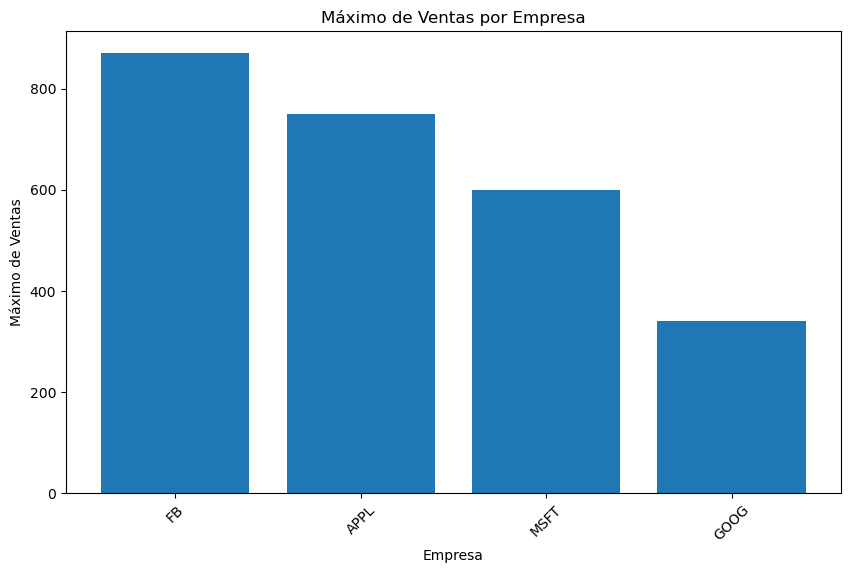

In [15]:
df_agrupado_pandas = df_agrupado_pandas.sort_values('max(Ventas)', ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_agrupado_pandas['Empresa'], df_agrupado_pandas['max(Ventas)'])
plt.xlabel('Empresa')
plt.ylabel('Máximo de Ventas')
plt.title('Máximo de Ventas por Empresa')
plt.xticks(rotation=45)  # Rotar las etiquetas si son muchas o largas
plt.show()
